### Analizando resultados parámetros por pareja

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
# sns.set()

In [6]:
df_humans = pd.read_csv('./Data/humans_only_absent.csv')
df_MB = pd.read_csv('./Data/output0.csv')
#df_WS = pd.read_csv('./Data/output1.csv')
#df_FR = pd.read_csv('./Data/output2.csv')

In [7]:
df_humans['Model'] = 'Humans'
df_MB['Model'] = 'MBiases'
#df_WS['Model'] = 'WSLS'
#df_FR['Model'] = 'FRA'
# df = pd.concat([df_humans, df_MB, df_WS, df_FR])
df = pd.concat([df_humans, df_MB])
df.head(2)

,Dyad,Round,Player,Answer,Time,a11,a12,a13,a14,a15,...,Similarity,Score_LAG1,Consistency_LEAD1,Joint_LAG1,Dif_consist_LAG1,RegionGo,Similarity_LAG1,Model,index,Strategy
0,140-615,1,140-615PL1,Absent,41857.0,0,0,1,0,0,...,0.727273,NaN,0.673077,NaN,NaN,RS,NaN,Humans,NaN,NaN
1,140-615,9,140-615PL1,Absent,28215.0,0,0,0,0,0,...,0.424242,18.0,0.000000,14.0,0.249215,NOTHING,0.727273,Humans,NaN,NaN


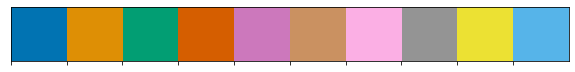

In [8]:
paleta = sns.color_palette('colorblind')
sns.palplot(paleta)
#colores = {'WSLS':paleta[9], 'FRA':paleta[1], 'MBiases':paleta[5]}
colores = {'MBiases':paleta[2], 'WSLS':paleta[8], 'FRA':paleta[3], 'Humans':paleta[9]}

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


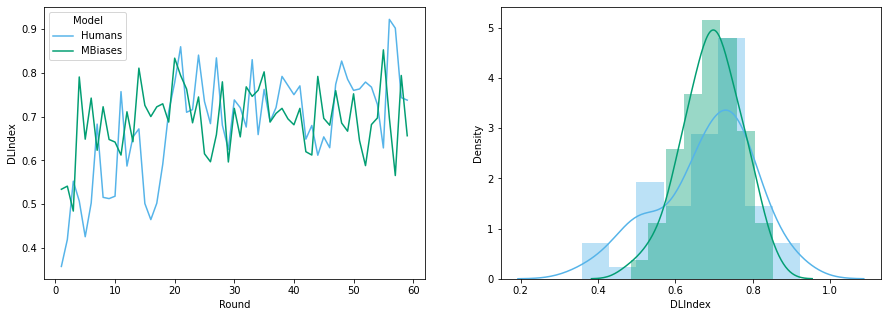

In [9]:
aux = df.groupby(['Model', 'Round'])['DLIndex'].mean().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.lineplot(x='Round', y='DLIndex', hue='Model', data=aux, palette=colores, ax=axes[0])
for key, grp in aux.groupby('Model'):
    sns.distplot(grp['DLIndex'], ax=axes[1], hist=True, label=key, color=colores[key])
plt.show()

In [ ]:
dyads_max = df_WS.groupby('Dyad')['DLIndex'].mean().sort_values(ascending=False).index.tolist()[:3]
aux = df_WS.groupby(['Round', 'Dyad'])['DLIndex'].mean().reset_index()
fig, ax = plt.subplots(figsize=(8,4))
for key, grp in aux.groupby('Dyad'):
    if key in dyads_max:
        sns.lineplot(x=grp['Round'], y=grp['DLIndex'], ax=ax)
plt.show()

In [ ]:
df.groupby('Model')['Joint'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot('Joint', hue='Model', data=df, palette=colores)
plt.show()

In [ ]:
from FRA import FRASim

cols = ['a' + str(i+1) + str(j+1) for i in range(8) for j in range(8)]

for dyad, grp in df.groupby(['Dyad', 'Round']):
    players = grp.Player.unique()
    pl1 = grp[grp['Player']==players[0]]
    pl2 = grp[grp['Player']==players[1]]
    region1 = pl1[cols].apply(lambda x: list(x), axis=1)
    region2 = pl2[cols].apply(lambda x: list(x), axis=1)
    overlap = np.multiply(region1, region2)
    print(overlap)

#df['overlap'] = df.apply(lambda x: find_overlap(x), axis=1)

In [ ]:
fig = plt.figure(figsize=(15,8))
split = df_fitted['DL'].unique()
for i, sp in enumerate(split):
    df = df_fitted[df_fitted['DL']==sp].sort_values(by='Model')
    plt.subplot(2,4,i+1)
    ax = sns.stripplot(x='Model', y='dev', data=df)
    ax.set_ylim([-5,120])
    plt.xlabel('Model')
    plt.ylabel('dev')
    plt.title(sp)
plt.show()

In [ ]:
df_MB['overlap_med'] = df_MB.Joint > 16
df_MB['overlap_med'] = np.where(df_MB.Joint == False, '<16', '>16')
sns.lmplot(x='Round', y='DLIndex', 
           hue='overlap_med', data=df_MB,
          ci=None, size=5)

In [ ]:
df_FR['overlap_med'] = df_FR.Joint > 16
df_FR['overlap_med'] = np.where(df_FR.Joint == False, '<16', '>16')
sns.lmplot(x='Round', y='DLIndex', 
           hue='overlap_med', data=df_FR,
          ci=None, size=5)

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot('Category', hue='Model', data=df, palette=colores)
plt.show()